# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_url}&q={city}&appid={weather_api_key}&units={units}"


In [4]:
# Declare variables for API response and count of number of cities for print log
response_json = []
city_count = 0

print("Beginning Data Retrieval \n-----------------------------")

# Perform weather check on each city using a series of successive API calls and generate print log
for city in range(len(cities)):#city #{x+1}
    
    # Test for response errors in performing API calls and 'ignore'
    try:
        city_count = city_count + 1
        print(f"Requesting City #{city_count} | {str.title(cities[city])}")  
        query_url = f"{base_url}&q={str(cities[city])}&appid={weather_api_key}&units={units}"
    
        # Run a request to endpoint and convert result to json
        city_data = requests.get(query_url).json()
        time.sleep(1)
                
        # Extract city name, temparature, latitude, humidity, cloudiness and windspeed
        response_json.append({"City_ID":city_count,"City":city_data["name"], "Cloudiness":city_data["clouds"]["all"], 
                          "Country":city_data["sys"]["country"], "Date":city_data["dt"], 
                          "Humidity":city_data["main"]["humidity"],"Latitude":city_data["coord"]["lat"], 
                          "Longitude":city_data["coord"]["lon"], "Max Temp":city_data["main"]["temp_max"], 
                          "Wind Speed":city_data["wind"]["speed"]})
    except:
        city_count = city_count - 1
        print(f"{str.title(cities[city])} was not found.  Requesting new City ...")  
        pass
    
print("\n-----------------------------\nData Retrieval Complete\n-----------------------------")   

Beginning Data Retrieval 
-----------------------------
Requesting City #1 | Iranshahr
Requesting City #2 | Bandarbeyla
Requesting City #3 | Vardo
Requesting City #4 | Longyearbyen
Requesting City #5 | Kruisfontein
Requesting City #6 | Clyde River
Requesting City #7 | Bluff
Requesting City #8 | Cape Town
Requesting City #9 | Palmer
Requesting City #10 | Rikitea
Requesting City #11 | Bolton
Requesting City #12 | Barrow
Requesting City #13 | Pevek
Requesting City #14 | Leningradskiy
Requesting City #15 | Cayenne
Requesting City #16 | Busselton
Requesting City #17 | Illoqqortoormiut
Illoqqortoormiut was not found.  Requesting new City ...
Requesting City #17 | Barentsburg
Barentsburg was not found.  Requesting new City ...
Requesting City #17 | Tablac
Requesting City #18 | Along
Requesting City #19 | Taolanaro
Taolanaro was not found.  Requesting new City ...
Requesting City #19 | Kaspiyskiy
Requesting City #20 | Jamestown
Requesting City #21 | Ushuaia
Requesting City #22 | Severo-Kurilsk

Requesting City #199 | Atar
Requesting City #200 | Kavaratti
Requesting City #201 | Butaritari
Requesting City #202 | Svidnik
Requesting City #203 | Vilyuysk
Requesting City #204 | Rocha
Requesting City #205 | Ahuimanu
Requesting City #206 | Pisco
Requesting City #207 | Cidreira
Requesting City #208 | Alamogordo
Requesting City #209 | Pinugay
Requesting City #210 | Murray Bridge
Requesting City #211 | Jequitinhonha
Requesting City #212 | Maxixe
Requesting City #213 | Vao
Requesting City #214 | Radishchevo
Requesting City #215 | Ilulissat
Requesting City #216 | Sapulpa
Requesting City #217 | Mujiayingzi
Requesting City #218 | Alofi
Requesting City #219 | Sistranda
Requesting City #220 | Paradwip
Paradwip was not found.  Requesting new City ...
Requesting City #220 | Doha
Requesting City #221 | Anastacio
Requesting City #222 | Namibe
Requesting City #223 | Harper
Requesting City #224 | Moranbah
Requesting City #225 | Digha
Requesting City #226 | Leshukonskoye
Requesting City #227 | Alexa

Requesting City #412 | Sahrak
Sahrak was not found.  Requesting new City ...
Requesting City #412 | Plettenberg Bay
Requesting City #413 | Bilma
Requesting City #414 | Khonuu
Khonuu was not found.  Requesting new City ...
Requesting City #414 | Mergui
Mergui was not found.  Requesting new City ...
Requesting City #414 | Sisimiut
Requesting City #415 | Punta Alta
Requesting City #416 | Ferkessedougou
Requesting City #417 | Broken Hill
Requesting City #418 | Paamiut
Requesting City #419 | Manokwari
Requesting City #420 | Cairns
Requesting City #421 | Bontang
Requesting City #422 | Lompoc
Requesting City #423 | Port Elizabeth
Requesting City #424 | Pathein
Requesting City #425 | Duki
Requesting City #426 | Turayf
Requesting City #427 | Borlange
Borlange was not found.  Requesting new City ...
Requesting City #427 | Port Blair
Requesting City #428 | Picota
Requesting City #429 | Komsomolskiy
Requesting City #430 | Oyama
Requesting City #431 | Jacareacanga
Requesting City #432 | Conde
Reque

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create dataframe, export city data into a csv and then display dataframe
city_df = pd.DataFrame(response_json, columns = ["City_ID","City", "Cloudiness", "Country", "Date", "Humidity", 
                                            "Latitude", "Longitude", "Max Temp","Wind Speed"])

city_df.to_csv(output_data_file, index=False, header=True)
city_df.count()


City_ID       548
City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Latitude      548
Longitude     548
Max Temp      548
Wind Speed    548
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Check humidity > 100
city_df.describe()

,City_ID,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
count,548.000000,548.000000,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000
mean,274.500000,52.970803,1.593859e+09,68.468978,20.858723,19.829343,69.934964,8.145310
std,158.338246,37.976793,3.221276e+02,23.671444,33.734917,91.656818,16.199148,5.460655
min,1.000000,0.000000,1.593858e+09,5.000000,-54.800000,-179.170000,26.600000,0.160000
25%,137.750000,12.750000,1.593859e+09,52.000000,-7.260000,-58.952500,58.005000,4.000000
50%,274.500000,60.500000,1.593859e+09,75.000000,26.255000,24.700000,72.375000,6.930000
75%,411.250000,90.000000,1.593859e+09,87.000000,49.915000,102.272500,79.500000,10.972500
max,548.000000,100.000000,1.593859e+09,100.000000,78.220000,179.320000,117.590000,32.210000


In [7]:
# Get the indices of cities that have humidity over 100%
CityIndex = city_df[city_df["Humidity"] > 100].index
CityIndex


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data"
clean_city_data_df = city_df.drop(CityIndex, inplace=False)
clean_city_data_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,1,Iranshahr,23,IR,1593858449,5,27.20,60.68,117.59,6.64
1,2,Bandarbeyla,75,SO,1593858451,39,9.49,50.81,91.94,28.74
2,3,Vardø,40,NO,1593857979,71,70.37,31.11,55.40,8.05
3,4,Longyearbyen,75,SJ,1593858454,70,78.22,15.64,46.40,9.17
4,5,Kruisfontein,96,ZA,1593857926,34,-34.00,24.73,65.23,10.60


In [9]:
# Extract relevant fields from the data frame (NB output file provided included all fields in df so no changes made)
# Export the City_Data into a csv
clean_city_data_df.to_csv("output_data/cleaned_cities.csv", index=False, header=True)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

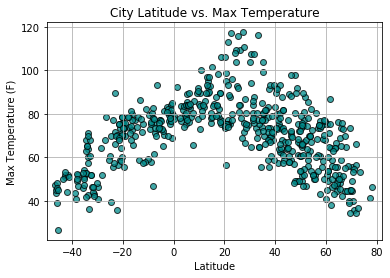

In [10]:
# Create plot
fig, ax1 = plt.subplots()
plt.grid(True)

# Centre x-axis
x_max = clean_city_data_df["Latitude"].max()*1.05
x_min = clean_city_data_df["Latitude"].min()/1.1
plt.xlim(x_min,x_max)

# Title and label scatter plot 
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Max Temp"], marker="o", 
            facecolors="darkcyan", edgecolors="black", alpha = 0.75)
plt.savefig("output_data/Fig2.png")

plt.show()


* This scatterplot shows the relationship between proximity to the equator and maximum daily temperature.  Intuitively you would expect cities closest to the equator ie closest to a Latitude of zero to have the highest maximum temperatures, although from above it is surprising to see cities between 0 and 40 latitude (in the Northern hemisphere) are in the highest range of maximum temperatures (90-100).  More surprising even still is that the city with the highest temperature is sitting in the range 20-40 latitude, which is more than 2'220kms (1'380 miles) north of the equator

## Latitude vs. Humidity Plot

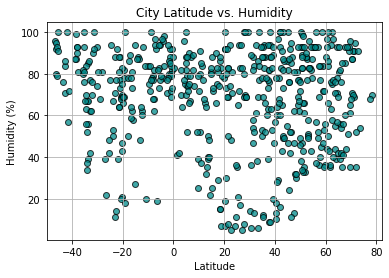

In [11]:
# Create plot
fig, ax1 = plt.subplots()
plt.grid(True)

# Centre x-axis
x_max = clean_city_data_df["Latitude"].max()*1.05
x_min =clean_city_data_df["Latitude"].min()/1.1
plt.xlim(x_min,x_max)

# Title and label scatter plot
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Humidity"], marker="o", 
            facecolors="darkcyan", edgecolors="black", alpha = 0.75)
plt.savefig("output_data/Fig3.png")

plt.show()


* This scatterplot helps to show relationship between seasons (assumed from a city's latitude) and humidity.  For example, cities in the Southern hemisphere (ie cities with latitudes below zero) are currently either in early winter or heading into monsoon season.  Given humidity is a measure of water vapour in the air, as you would expect the scatterplot above shows these cities have high humidity (it's raining ALOT!!).  In the northern hemisphere, as temperatures increase in summer which they do the higher the latitude, the more evaporation that occurs ie the more the humidity increases


## Latitude vs. Cloudiness Plot

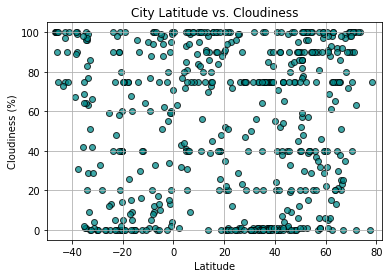

In [12]:
# Create plot
fig, ax1 = plt.subplots()
plt.grid(True)

# Centre x-axis
x_max = clean_city_data_df["Latitude"].max()*1.05
x_min =clean_city_data_df["Latitude"].min()/1.1
plt.xlim(x_min,x_max)

# Title and label scatter plot
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloudiness"], marker="o", 
            facecolors="darkcyan", edgecolors="black", alpha = 0.75)
plt.savefig("output_data/Fig4.png")

plt.show()


This scatterplot is shows the cloudiness of cities as compared with a city's latitude.  From the above it is difficult to see any clear pattern.  When looking at the 2 corridors, in the ranges 0 to 20 degrees latitude and 0 to -20, there does appear to be almost an inverse pattern across them which may be attributable to their proximity to the equator

## Latitude vs. Wind Speed Plot

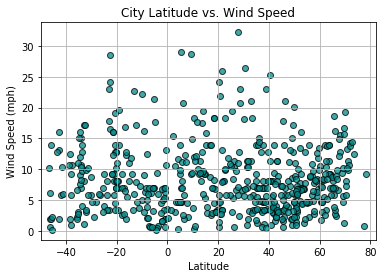

In [13]:
# Create plot
fig, ax1 = plt.subplots()
plt.grid(True)

# Centre x-axis
x_max = clean_city_data_df["Latitude"].max()*1.05
x_min =clean_city_data_df["Latitude"].min()/1.1
plt.xlim(x_min,x_max)

# Title and label scatter plot
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed"], marker="o", 
            facecolors="darkcyan", edgecolors="black", alpha = 0.75)
plt.savefig("output_data/Fig5.png")

plt.show()


This scatterplot looks to show the relationship between wind speed and latitude.  There is no clear evidence here of the trade winds which are known to blow between the equator and +/- 30 degrees in latitude

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] >= 0]
north_hemi_df.head()


,City_ID,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,1,Iranshahr,23,IR,1593858449,5,27.20,60.68,117.59,6.64
1,2,Bandarbeyla,75,SO,1593858451,39,9.49,50.81,91.94,28.74
2,3,Vardø,40,NO,1593857979,71,70.37,31.11,55.40,8.05
3,4,Longyearbyen,75,SJ,1593858454,70,78.22,15.64,46.40,9.17
5,6,Clyde River,90,CA,1593858458,87,70.47,-68.59,44.60,7.29


In [16]:
# Create Northern and Southern Hemisphere DataFrames
south_hemi_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] < 0]
south_hemi_df.head()


,City_ID,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
4,5,Kruisfontein,96,ZA,1593857926,34,-34.00,24.73,65.23,10.60
6,7,Bluff,100,NZ,1593858459,96,-46.60,168.33,47.41,10.22
7,8,Cape Town,20,ZA,1593858386,67,-33.93,18.42,64.00,14.99
9,10,Rikitea,5,PF,1593858464,71,-23.12,-134.97,71.71,17.83
15,16,Busselton,77,AU,1593858474,56,-33.65,115.33,60.01,12.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.4365146331910275


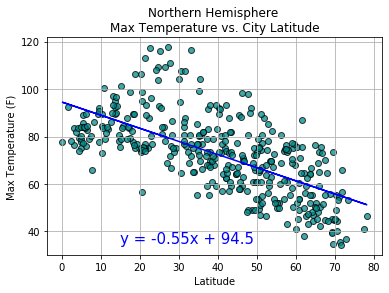

In [17]:
# Create plot
fig, ax1 = plt.subplots()

# Add grid lines
plt.grid(True)

# Title and label scatter plot
plt.title("Northern Hemisphere \nMax Temperature vs. City Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Store Maximum Temperature and Latitude as x and y values
y_axis = north_hemi_df["Max Temp"]
x_axis = north_hemi_df["Latitude"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis, marker="o", facecolors="darkcyan", 
            edgecolors="black", alpha = 0.75)
plt.plot(x_axis,regress_values,"r-",color ="blue")
plt.annotate(line_eq,(15,35),fontsize=15,color="blue")

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.6062352714543939


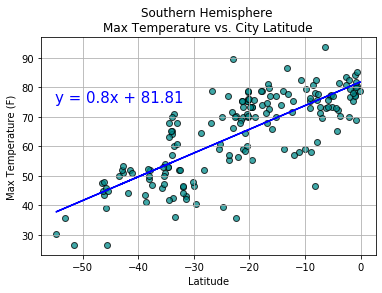

In [18]:
# Create plot
fig, ax1 = plt.subplots()

# Add grid lines
plt.grid(True)

# Title and label scatter plot
plt.title("Southern Hemisphere \nMax Temperature vs. City Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Store Maximum Temperature and Latitude as x and y values
y_axis = south_hemi_df["Max Temp"]
x_axis = south_hemi_df["Latitude"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis, marker="o", facecolors="darkcyan", 
            edgecolors="black", alpha = 0.75)
plt.plot(x_axis,regress_values,"r-",color ="blue")
plt.annotate(line_eq,(-55,75),fontsize=15,color="blue")

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()


A comparison of the above plots is a clear representation showing the inverse relationship between the Northern and Southern Hemisphere maximum temperatures caused by the seasons.  It also demonstrates at that maximum temperatures, regardless of which hemisphere a city is in, will increase the closer to the equator it is.  The R squared value in the Southern Hemisphere line of best fit is significantly higher than it's counterpart indicating a closer fit of data to the line ie additional observations more likely to fall closely to the line.  This can be explained by the lower number of 'outliers' appearing in the Southern Hemisphere data set as compared with the Northern Hemisphere data, potentially due to the lower number of total cities in the South   

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0025674851369747193


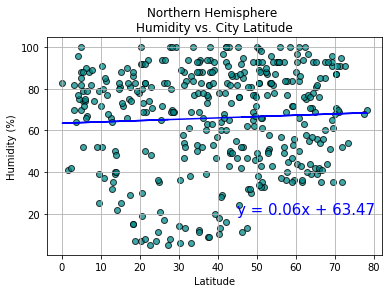

In [19]:
# Create plot
fig, ax1 = plt.subplots()

# Add grid lines
plt.grid(True)

# Title and label scatter plot
plt.title("Northern Hemisphere \nHumidity vs. City Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Store Humidity and Latitude as x and y values
y_axis = north_hemi_df["Humidity"]
x_axis = north_hemi_df["Latitude"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis, marker="o", facecolors="darkcyan", 
            edgecolors="black", alpha = 0.75)
plt.plot(x_axis,regress_values,"r-",color ="blue")
plt.annotate(line_eq,(45,20),fontsize=15,color="blue")

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.00023634327118545977


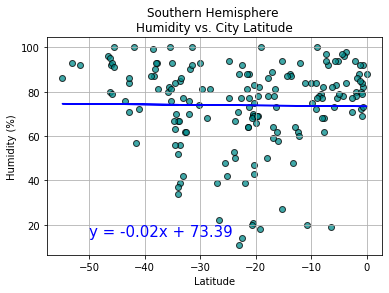

In [20]:
# Create plot
fig, ax1 = plt.subplots()

# Add grid lines
plt.grid(True)

# Title and label scatter plot
plt.title("Southern Hemisphere \nHumidity vs. City Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Store Humidity and Latitude as x and y values
y_axis = south_hemi_df["Humidity"]
x_axis = south_hemi_df["Latitude"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis, marker="o", facecolors="darkcyan", 
            edgecolors="black", alpha = 0.75)
plt.plot(x_axis,regress_values,"r-",color ="blue")
plt.annotate(line_eq,(-50,15),fontsize=15,color="blue")

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()

This comparison of hemisphere serves to show the benefits of drilling down into the data.  From a 'high level', the aggregated graph could have left its audience feeling confident in assuming a clear relationship between seasons (assumed from a city's latitude) and humidity. Drilling down on the data however shows the 'assumed' relationship is in fact not clear.  This is further demonstrated by the r squared values, which in both cases are quite low reflecting both data sets have highly disaggregated data ie high disparity in the spread of data points

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0002549489094483404


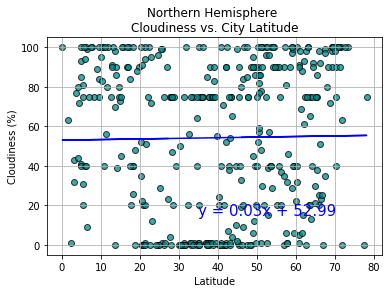

In [21]:
# Create plot
fig, ax1 = plt.subplots()

# Add grid lines
plt.grid(True)

plt.title("Northern Hemisphere \nCloudiness vs. City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Store Cloudiness and Latitude as x and y values
y_axis = north_hemi_df["Cloudiness"]
x_axis = north_hemi_df["Latitude"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis, marker="o", facecolors="darkcyan", 
            edgecolors="black", alpha = 0.75)
plt.plot(x_axis,regress_values,"r-",color ="blue")
plt.annotate(line_eq,(35,15),fontsize=15,color="blue")

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.05015026164534352


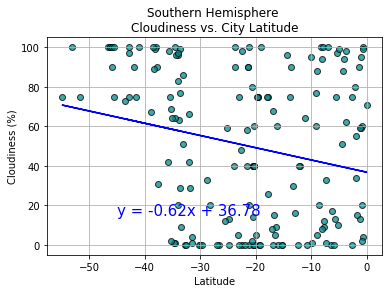

In [22]:
# Create plot
fig, ax1 = plt.subplots()

# Add grid lines
plt.grid(True)

plt.title("Southern Hemisphere \nCloudiness vs. City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Store Cloudiness and Latitude as x and y values
y_axis = south_hemi_df["Cloudiness"]
x_axis = south_hemi_df["Latitude"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis, marker="o", facecolors="darkcyan", 
            edgecolors="black", alpha = 0.75)
plt.plot(x_axis,regress_values,"r-",color ="blue")
plt.annotate(line_eq,(-45,15),fontsize=15,color="blue")

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()

A comparison of both data sets further reinforces earlier observations that there does not appear to be a clear relationship between cloudiness and city latitude.  The r square value in each data set is also extremely low, further demonstrating this

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.003854487486507059


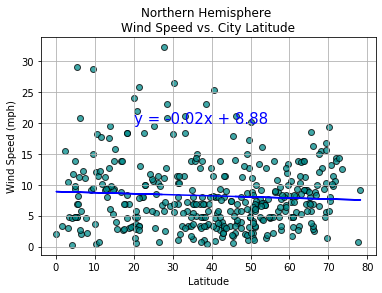

In [23]:
# Create plot
fig, ax1 = plt.subplots()

# Add grid lines
plt.grid(True)

plt.title("Northern Hemisphere \nWind Speed vs. City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Store Wind Speed and Latitude as x and y values
y_axis = north_hemi_df["Wind Speed"]
x_axis = north_hemi_df["Latitude"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis, marker="o", facecolors="darkcyan", 
            edgecolors="black", alpha = 0.75)
plt.plot(x_axis,regress_values,"r-",color ="blue")
plt.annotate(line_eq,(20,20),fontsize=15,color="blue")

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.00565137210280364


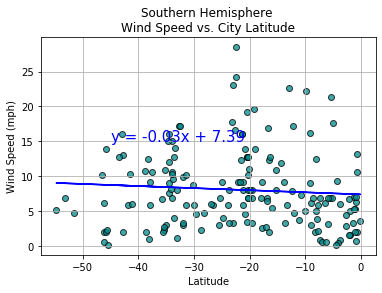

In [24]:
# Create plot
fig, ax1 = plt.subplots()

# Add grid lines
plt.grid(True)

plt.title("Southern Hemisphere \nWind Speed vs. City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Store Wind Speed and Latitude as x and y values
y_axis = south_hemi_df["Wind Speed"]
x_axis = south_hemi_df["Latitude"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis, marker="o", facecolors="darkcyan", 
            edgecolors="black", alpha = 0.75)
plt.plot(x_axis,regress_values,"r-",color ="blue")
plt.annotate(line_eq,(-45,15),fontsize=15,color="blue")

# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()


As with the comparison of cloudiness and city latitude by hemisphere, this breakdown also reinforces earlier observations of a lack of relationship between wind speed and city latitude.  In this comparison as well the extremely low r square value in each data serves to reinforce this